In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

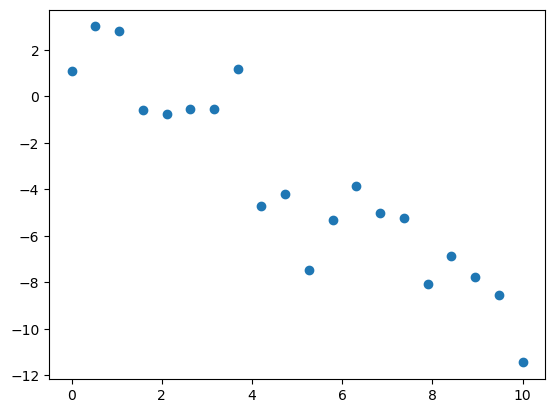

In [23]:
LEN = 10
m, b = -1, 1
sigma = 2.0

BATCH_SIZE = 20

x_data = np.linspace(0, 10, BATCH_SIZE)
y_data = [sigma*np.random.randn(1) + (m*y + b) for y in x_data ]

y_actual = [m*y + b for y in x_data]

plt.scatter(x_data, y_data)
plt.show()

Initialize the state

In [35]:
w = 1
b = 1
epsilon = 0.01

Keep running this cell to do iterations of back prop

$ u = w * x $

$ y = u + b $

$ \frac{\partial E}{\partial y} = y - y_{actual}$

$ \frac{\partial E}{\partial b} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial b}  = \frac{\partial E}{\partial y}$

$ \frac{\partial E}{\partial w} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial u} \frac{\partial u}{\partial w}  = \frac{\partial E}{\partial y} x$




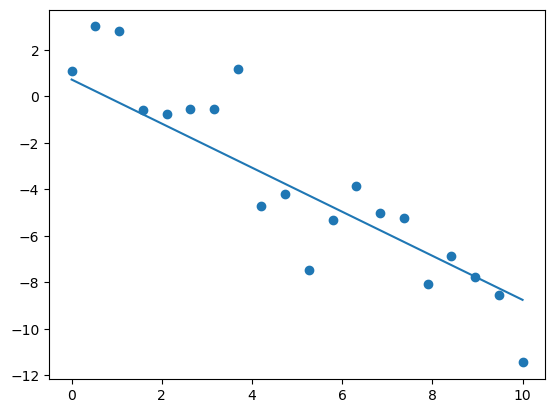

Loss:  0.012762502373487899
Old weight:  -0.9476132471666114
Old bias:  0.7223215416258453
New weight:  -0.9516511081119576
New bias:  0.7224789885679173


In [48]:
# forward
u = w * x_data
y = u + b

plt.scatter(x_data, y_data)
plt.plot(x_data, y)
plt.show()

# Loss
E = np.mean(0.5 * (y - y_actual)**2)
print("Loss: ", E)
print("Old weight: ", w)
print("Old bias: ", b)

# backwards
temp = y - y_actual
b = np.mean(b - epsilon * temp)
w = np.mean(w - epsilon * temp * x_data)


print("New weight: ", w)
print("New bias: ", b)



how does backprop work with relu?

# Logic Gates

I think it has a hard time converging. It might work better with more perceptrons

```
A -> u -> z -> p -> E
     ^
     B
```

In [62]:
AND = np.array([
	[0, 0, 0],
	[0, 1, 0],
	[1, 0, 0],
	[1, 1, 1]
])
OR = np.array([
	[0, 0, 0],
	[0, 1, 1],
	[1, 0, 1],
	[1, 1, 1]
])
NAND = np.array([
	[0, 0, 1],
	[0, 1, 1],
	[1, 0, 1],
	[1, 1, 0]
])
NOR = np.array([
	[0, 0, 1],
	[0, 1, 0],
	[1, 0, 0],
	[1, 1, 0]
])



In [364]:
w_A, w_B, b = 2, 2, -3 # ideal
# w_A, w_B, b = 1.3, 1.4, -2.2 # not ideal

sigma = lambda x: 1 / (1+np.exp(-8*x))
BATCH_SIZE = 10
epsilon = 1e-1

Keep running this cell to "iterate" forwards prop and backprop


using log-loss (for binary classification):

$ L(p_i) = p_i^{y_i} (1-p_i)^{1-y_i} = \begin{cases} p_i, \quad y_i = 1 \\ 1- p_i , \quad y_i = 0 \end{cases} $

$ L(p) = \Pi_{i=0}^k \quad p_i^{y_i} (1-p_i)^{1-y_i} $

$ LL(p) = \Sigma \quad y_i \log(p_i) + (1 - y_i) \log(1-p_i) \quad $ take log on both sides

___

$ u = w_A A + w_B$

$ z = u + b $

$ p = \sigma(z) $

$\frac{\partial ll}{\partial p} = \Sigma \left( \frac{y_{actual}}{p} + \frac{1-y_{actual}}{1-p} \right) $

$ \frac{\partial p}{\partial z} = p (1-p) $

$ \frac{\partial ll}{\partial b} = \frac{\partial ll}{\partial p} \frac{\partial p}{\partial z} \frac{\partial z}{\partial b} $

$ \frac{\partial ll}{\partial w_A} = \frac{\partial ll}{\partial p} \frac{\partial p}{\partial z} \frac{\partial z}{\partial u} \frac{\partial u}{\partial w_A}  $

In [365]:
for i in range(800):
	data = AND[np.random.choice(4, BATCH_SIZE)]
	A, B = data[:, 0], data[:, 1]
	y_actual = data[:, 2]

	# forward prop
	u = w_A * A + w_B * B

	z = u + b

	y = sigma(z)
	print("Actual: ", y_actual)
	print("Guess: ", np.round(y, 2))

	# we are doing log loss on each individual example NOT on the entire batch.
	logloss = np.mean( -y_actual * np.log(y) - (1-y_actual) * np.log(1-y))
	print("Cross Entropy Loss: ", logloss)
	if np.isnan(logloss).any():
		print("Log loss exploded too much!")
		break

	df = pd.DataFrame([[b, w_A, w_B]], columns=["bias", "w_A", "w_B"])

	# backprop now
	temp = (-y_actual / y - (1-y_actual) / (1- y)) * y * (1-y)

	b = np.mean(b - epsilon * temp)
	w_A = np.mean(w_A - epsilon * temp * A)
	w_B = np.mean(w_A - epsilon * temp * B)

	df.loc[-1] = [b, w_A, w_B] # adding
	df.index += 1
	print(df)

Actual:  [0 0 1 0 0 0 0 0 0 0]
Guess:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Cross Entropy Loss:  0.000301865739381321
      bias       w_A       w_B
1 -3.00000  2.000000  2.000000
0 -2.99997  2.000023  2.000034
Actual:  [0 0 0 0 0 0 1 0 0 0]
Guess:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Cross Entropy Loss:  0.00023485557738040148
       bias       w_A       w_B
1 -2.999970  2.000023  2.000034
0 -2.999946  2.000037  2.000050
Actual:  [0 0 1 1 0 0 0 0 1 0]
Guess:  [0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
Cross Entropy Loss:  0.0002683405163534354
       bias       w_A       w_B
1 -2.999946  2.000037  2.000050
0 -2.999920  2.000057  2.000074
Actual:  [0 1 0 0 0 1 0 0 0 0]
Guess:  [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
Cross Entropy Loss:  0.00023486025564429876
       bias       w_A       w_B
1 -2.999920  2.000057  2.000074
0 -2.999896  2.000077  2.000087
Actual:  [0 1 0 0 1 0 1 0 0 0]
Guess:  [0. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
Cross Entropy Loss:  0.00023477136516506753
       bias       w_A       w_B
1 -2.999896  2.

# Using B-Spline / I-Spline for 



# Polynomial Regression